In [2]:
import os
import cv2
import numpy as np

img_size = (150, 150)

def resize_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

train_dir = '../dataset/train'
validation_dir = '../dataset/val'
test_dir = '../dataset/test'

X_train, y_train = resize_images_from_directory(train_dir)
X_validation, y_validation = resize_images_from_directory(validation_dir)
X_test, y_test = resize_images_from_directory(test_dir)

X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_validation_reshape = X_validation.reshape(X_validation.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

param = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
}

grid = GridSearchCV(LinearSVC(), param, scoring='accuracy')
grid.fit(X_validation_reshape, y_validation)

C:\Users\hugod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hugod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hugod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hugod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear 

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [13]:
best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_

print("Best parameters:", best_params)
print("Best score:", best_score)
print('Score with best estimator:', best_estimator.score(X_validation_reshape, y_validation))

confusion_matrix(y_test, best_estimator.predict(X_test_reshape))

Best parameters: {'C': 0.001, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best score: 0.7
Score with best estimator: 0.8125


array([[170,  64],
       [289, 101]], dtype=int64)

In [22]:
model = LinearSVC(C=0.001, dual=False, loss='squared_hinge', penalty='l1')
model.fit(X_train_reshape, y_train)
model.score(X_validation_reshape, y_validation)

C:\Users\hugod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.875

Success Rate: 0.7467948717948718
Success Rate for Pneumonia: 0.9871794871794872
Success Rate for Normal: 0.34615384615384615


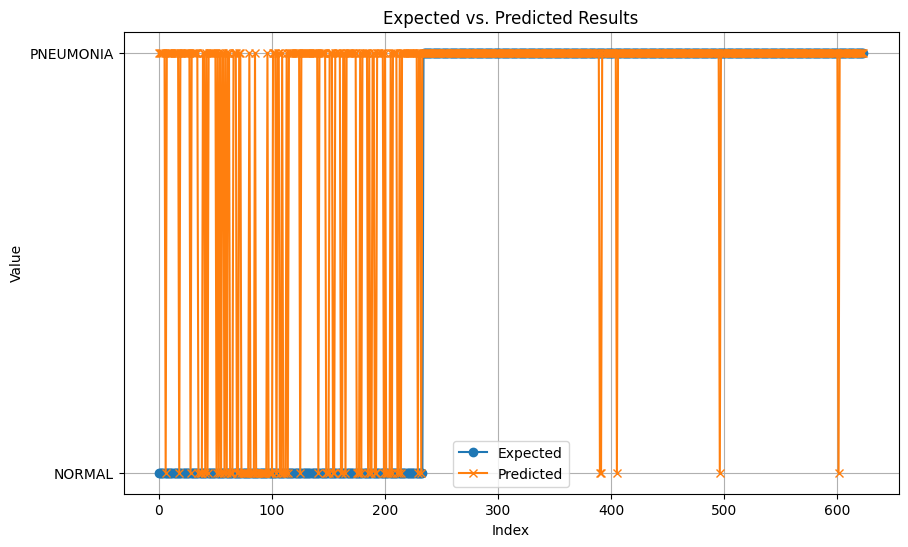

In [23]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test_reshape)
indices = np.arange(len(y_test))

def success_rate() :
    num_correct = sum(y_test == predictions)
    total_predictions = len(y_test)
    return num_correct / total_predictions

def success_rate_per_class(class_name):
    expected = y_test[y_test == class_name]
    predicted = predictions[y_test == class_name]
    num_correct = sum(expected == predicted)
    total_predictions = len(expected)
    return num_correct / total_predictions

print("Success Rate:", success_rate())
print("Success Rate for Pneumonia:", success_rate_per_class('PNEUMONIA'))
print("Success Rate for Normal:", success_rate_per_class('NORMAL'))

plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Expected', marker='o')
plt.plot(indices, predictions, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Expected vs. Predicted Results')
plt.legend()
plt.grid(True)
plt.show()